# 분류 모형 Classification

---



**LDA, ROC, KNN에 대해서는 정확하게 이해를 하시는 게 좋겠습니다.**

## 1. 이론적 배경

### A. Classification

---



**반응변수가 질적(qualitative : 수치를 포함) / 범주형(categorical : True or False) 변수인 경우**

`-` example

- 응급실에 오는 사람들을 증상을 바탕으로 세 가지 범주로 분류함(Classification)
- 사용자의 IP주소, 과거 거래내역 등을 근거로 온라인 거래 승인 여부를 결정함(Binary)
- 이미지를 보고 개/고양이, 질병유무 등을 판별해냄(Binary)

`-` Linear Regression이 아닌 이유

> 반응변수의 숫자는 범주의 구분을 위한 레이블일 뿐 숫자로써의 의미는 전혀 가지지 않음.
>
> Y에 대한 직접적 모형화가 아닌 Y가 특정 범주에 포함될 확률을 모형화함.

`-` 임계치 Threshold

* 특정 관측치에 대해 p(X) > 0.5인 경우 True로 예측할 수 있다. 보수적인 결정을 내리고자 하는 경우 p(X) > 0.1을 True라고 예측하는 것도 가능하다. 이러한 기준이 되는 수치를 임계치라고 한다.

### B. 모형

---



관심이 되는 반응변수 값을 보통 1, 나머지를 0이라 하자.

$$Pr(Y = 1|X) = P(X) ∈ (0, 1)$$

위 확률을 $X$에 대하여 선형으로 모형화하면(선형회귀모형)

$$P(X) = \beta_0 + \beta_1 X : \text{확률값이 모든 실수로 나타난다}$$

따라서 확률값을 $(0, 1)$사이의 값으로 예측해주는 모형함수가 필요한데, 대표적인 것이 로지스틱 함수이다.

$$P(X) = \frac{\exp(\beta_0 + \beta_1 X)}{1 + \exp(\beta_0 + \beta_1 X)}$$

`-` 위 모형은 간단한 계산을 통해 다음과 같이 표현된다.

$$\text{odds} : \frac{P(X)}{1-P(X)} = \exp(\beta_0 + \beta_1 X) ∈ (0, ∞)$$

$$\text{logit} : log\Big(\frac{P(X)}{1-P(X)}\Big) = \beta_0 + \beta_1 X ∈ (-∞, ∞)$$

### C. 추정

---



> 반응변수가 범주형변수이므로, 최소제곱법을 사용하는 것은 적절하지 않을 수 있음. 애초에 못구함.
>
> 최대우도추정법(MLE)으로 보통 추정한다.
>
> 명시적인 해가 존재하지 않아 수치적인 접근으로 추정치를 얻는다.

$$P(Y=1) = \Big(\frac{\exp(z)}{1+\exp(z)}\Big)^y, P(Y=0) = \Big(\frac{1}{1+\exp(z)}\Big)^{1-y}$$

### D. **선형판별분석**

---

베이즈 정리를 기반으로 한 사후 확률 계산

$$\begin{align} P(y|x)P(x) & = P(x|y)P(y) \\
P(y|x) & = \frac{P(x|y)P(y)}{P(x)}
\end{align}$$

> $x$가 어떤 분포를 따르는가? -> 정규분포 가정. $P(x|y = k) = f_k(x)$(k는 y의 범주), $P(Y=k) = \pi_k, ~ (\sum \pi_k = 1)$

$$P(Y = k | X = x) = p_k(x) = \frac{\pi_k f_k(x)}{\sum_{l=1}^{K}f_l(x)}$$

**선형판별분석 : LDA**

* 먼저 $p = 1, f_k(x)$가 정규분포임을 가정함. $N(\mu_k, \sigma_k^2)$
* 각 범주에 해당하는 분포의 분산은 동일하다 가정, 즉, $\sigma_1^2 = \cdots = \sigma^2_K = \sigma^2$ : 분산의 동질성 가정
* 이 경우 데이터 값 $x$에 대하여 조건부 확률 $p_k(x)$를 최대화하는 $k$를 판별(가장 포함될 확률이 높은 그룹을 찾는 것)하는 것은, $\frac{\pi_k f_k(x)}{\sum_{l=1}^{K}f_l(x)}$에서 분모가 동일하므로 분자의 값이 가장 큰 것을 찾는 것과 동일하다. 이는 다음과 같은 값을 최대로 하는 $k$를 찾는 것과 같음을 보일 수 있다. (분모는 Optimization의 해와 관련이 없음.)

$$\text{판별함수 : } \delta_k(x) = x\frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2\sigma^2} + \log \pi_k$$

* 판별함수가 1차 함수의 형태를 가지고 있으므로, 선형이다.

* 예를 들어 $K = 2, \pi_1 = \pi_2$인 경우(), 분류를 위한 경계치는 아래와 같이 간단히 된다.(각 그룹에 속할 확률과 그룹 별 분산이 동일하므로, 그룹 별 평균의 중심을 경계치로 함)

$$x = \frac{\mu_1 + \mu_2}{2}$$

`-` $p = 1$인 경우의 LDA 베이즈 분류기 근가

$$\begin{align} \hat \delta_k(x) & = x\frac{\hat\mu_k}{\hat\sigma^2} - \frac{\hat\mu_k^2}{2\hat\sigma^2} + \log \hat\pi_k \\
\hat\mu_k & = \frac{1}{n_k} \underset{i:y_i=k}{\sum} x_i : \text{범주 별 설명변수 평균} \\
\hat\sigma^2 & = \frac{1}{n - K} \overset{K}{\sum}\underset{i:y_i=k}{\sum}(x_i - \hat\mu_k)^2 : \text{범주 별 제곱합의 총합을 자유도로 나눈 것} \\
\hat\pi_k & = \frac{n_k}{n}
\end{align}$$

### E. Confusion matrix(혼동 행렬)

---

* Default 여부 혼동행렬

||TRUE|TRUE||
|-|-|-|-|
|Prediction|No|Yes|Total|
|No|9644|252|9896|
|YES|23|81|104|
|Total|9667|333|10000|

> 실제 채무 불이행자, True의 Yes에 해당하는 사람들에 대해서는 75%가 넘는 오분류가 나타남.
>
> 손해를 끼칠 위험이 큰 고객들을 분별해내야 하는 회사 입장에서는 위와 같은 결과는 바람직하지 않음.
>
> 데이터의 불균형 때문에 발생하는 문제. 디폴트를 하지 않는 사람들이 훨씬 더 많음.
>
> 베이즈 분류기에서도 전체 오류율을 최소화(Accuracy)하고자 하기 때문에 특정 범주에 대해서는 좋은 성능을 담보하지 않을 수 있음.

* 민감도(Sensitivity) : 주로 관심이 있는 쪽

> 1을 1로 분류하는 비율(진양성률, TPR)

* 특이도(Specificity)

> 0을 0으로 분류하는 비율(진음성률, TNR)

**임계치 조정** : 범주가 두 개인 경우 베이즈 분류기는 다음과 같은 조건을 만족하는 관측치에 한하여 default = YES로 분류함.

$$P(\text{default} = YES|X = x) > 0.5$$

민감도를 향상시키기 위해서 임계치를 낮춘다면, 특이도가 떨어진다.

### F. ROC curve

---

임계치를 변화시키면서 (1-특이도, 민감도)의 조합을 2차원 좌표평면 상에 나타낸 곡선

이상적으로는 왼쪽 상단(0, 1)을 통과하는 것이 좋음(가장 이상적인 모형), 이 경우 곡선 아래 면적이 1이 됨.

> 곡선 아래 면적이 1에 가까울수록 분류기의 성능이 좋은 것으로 볼 수 있다. 이 아래 면적을 AUC라 하며, 분류기의 성능을 나타내는 지표 중 하나로 활용된다.

### G. QDA

---



각 범주를 특정하는 정규분포의 분산에 이질성을 허용함. 분산이 동일하다는 가정이 없음.

이 경우 판별함수가 $x$에 대한 2차식의 형태로 주어져 LDA보다 유연한(복잡한) 모형이 된다.

> LDA를 써보고, 그 다음 QDA를 써보는 것이 좋다.

**Naive Bayes**

LDA, QDA를 사용할 때, 느슨하게 유사확률을 사용하는 분류기. p가 큰 경우 계산이 어렵기 때문.

$$P(x_1, \cdots, x_p | A = a) = \Pi_{i=1}^{p}P(x_i|A = a)$$

### I. K-nearest neighbors : KNN

---

* 조건부 확률을 인접한 $K$개의 data points의 상대 비율로 추정함

적절한 K값을 선택하는 것이 모형에서 중요함.

### J. 분류기의 성능 비교

---

* 범주가 2개일 때, LDA와 로지스틱 모형은 선형적인 경계를 생성한다는 측면에서 유사.
> 각 범주의 분포가 정규분포로 근사되는지 여부에 따라서 두 방식의 성능이 엇갈릴 수 있음.

* KNN은 decision boundary에 어떠한 가정도 하지 않음. 즉, 비선형의 경계일 경우 우월성이 보일 수 있음.

* QDA는 KNN과 LDA/로지스틱의 중간 쯤에 위치하는 방법이라 볼 수 있음.

`-` 여러 상황

각 범주 내의 변수들은 서로 독립인 정규분포

각 범주 내 변수들의 상관계수가 -0.5

각 범주 내의 변수들은 t분포

각 범주 내의 변수들은 각각 상관계수가 0.5, -0.5인 정규분포

각 범주 내의 변수들은 서로 독립인 정규분포, 반응변수가 두 변수의 이차 다항식을 이용한 결합으로 생성

각 범주 내의 변수들은 서로 독립인 정규분포, 반응변수가 두 변수의 복잡한 비선형결합으로 생성

> 모든 상황에서 우월한 분류기는 없음.

비교적 단순한 모형은 로지스틱이나 LDA가 우수, 복잡한 모형일수록 QDA -> KNN이 우수.

KNN에서도 적절한 수의 K를 설정하는 것이 필요함.

## 2. 실습

### **A. 라이브러리 imports**

---

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import  (LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

### B. Smarket Data 분석

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')
               Year      Lag1      Lag2      Lag3      Lag4      Lag5  \
Year       1.000000  0.029700  0.030596  0.033195  0.035689  0.029788   
Lag1       0.029700  1.000000 -0.026294 -0.010803 -0.002986 -0.005675   
Lag2       0.030596 -0.026294  1.000000 -0.025897 -0.010854 -0.003558   
Lag3       0.033195 -0.010803 -0.025897  1.000000 -0.024051 -0.018808   
Lag4       0.035689 -0.002986 -0.010854 -0.024051  1.000000 -0.027084   
Lag5       0.029788 -0.005675 -0.003558 -0.018808 -0.027084  1.000000   
Volume     0.539006  0.040910 -0.043383 -0.041824 -0.048414 -0.022002   
Today      0.030095 -0.026155 -0.010250 -0.002448 -0.006900 -0.034860   
Direction  0.074608 -0.039757 -0.024081  0.006132  0.004215  0.005423   

             Volume     Today  Direction  
Year       0.539006  0.030095   0.074608  
Lag1       0.040910 -0.026155  -0.039757  
Lag2      -0.043383 -0.

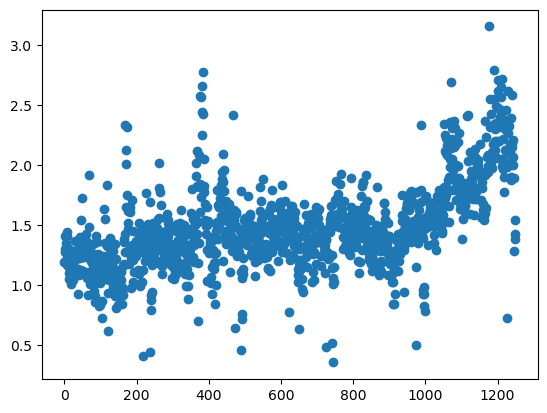

In [2]:
Smarket = load_data('Smarket')
Smarket
print(Smarket.columns)
import copy

Smar = copy.deepcopy(Smarket)
Smar['Direction'] = Smar['Direction'].map({'Up': 1, 'Down': 0})
print(Smar.corr())
plt.plot(Smar['Volume'], 'o')
plt.show()

`-` 로지스틱 회귀분석 적용

In [3]:
allvars = Smarket.columns.drop(['Today', 'Direction', 'Year'])
design = MS(allvars)
X = design.fit_transform(Smarket)
y = Smarket.Direction == "Up"
print(y)
glm = sm.GLM(y, X, family=sm.families.Binomial()) ## Bernoulli, logistic regression
results = glm.fit()
print(summarize(results))

0        True
1        True
2       False
3        True
4        True
        ...  
1245     True
1246    False
1247     True
1248    False
1249    False
Name: Direction, Length: 1250, dtype: bool
             coef  std err      z  P>|z|
intercept -0.1260    0.241 -0.523  0.601
Lag1      -0.0731    0.050 -1.457  0.145
Lag2      -0.0423    0.050 -0.845  0.398
Lag3       0.0111    0.050  0.222  0.824
Lag4       0.0094    0.050  0.187  0.851
Lag5       0.0103    0.050  0.208  0.835
Volume     0.1354    0.158  0.855  0.392


`-` Confusion Matrix 산출

In [4]:
probs = results.predict()
probs[:10]
labels = np.array(['Down']*1250)
labels[probs>0.5] = "Up" ## Prediction
print(confusion_table(labels, Smarket.Direction))
np.mean(labels == Smarket.Direction) ## Accuracy

Truth      Down   Up
Predicted           
Down        145  141
Up          457  507


0.5216

> Up을 1로 본다면, 민감도는 높고, 특이도는 낮은 상황

`-` 테스트 자료 검정

In [5]:
train = (Smarket.Year < 2005)
Smarket_train = Smarket.loc[train]
Smarket_test = Smarket.loc[~train]
Smarket_test.shape

X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]
glm_train = sm.GLM(y_train, X_train,family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)

In [6]:
D = Smarket.Direction
L_train, L_test = D.loc[train], D.loc[~train] ## train, test 데이터를 쪼갬
labels = np.array(['Down']*252)
labels[probs>0.5] = 'Up'
print(confusion_table(labels, L_test))
np.mean(labels == L_test) ## Accuracy

Truth      Down  Up
Predicted          
Down         77  97
Up           34  44


0.4801587301587302

`-` 전체 변수가 아닌 Lag1, Lag2만으로 로지스틱 회귀분석을 진행

In [7]:
model = MS(['Lag1', 'Lag2']).fit(Smarket)
X = model.transform(Smarket)
X_train, X_test = X.loc[train], X.loc[~train]
glm_train = sm.GLM(y_train,
X_train,
family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)
labels = np.array(['Down']*252)
labels[probs>0.5] = 'Up'
print(confusion_table(labels, L_test))
np.mean(labels == L_test) ## Accuracy

Truth      Down   Up
Predicted           
Down         35   35
Up           76  106


0.5595238095238095

> Accuracy가 확실히 개선됨.

`-` 새로운 데이터의 prediction 매커니즘 표시

In [8]:
newdata = pd.DataFrame({'Lag1':[1.2, 1.5], 'Lag2':[1.1, -0.8]});
newX = model.transform(newdata)
print(results.predict(newX))

0    0.479146
1    0.496094
dtype: float64


### B. LDA & QDA

`-` 공분산을 사용하는 분류 모형

In [9]:
lda = LDA(store_covariance=True)
XX_train, XX_test = [M.drop(columns=['intercept']) for M in [X_train, X_test]] ## 두 개 변수만 사용

a, c = np.unique(L_train, return_counts=True)
# print(c/np.sum(c))

lda.fit(XX_train, L_train)
print(lda.means_) ## 범주 1에 대한 mean vector, 범주 2에 대한 mean vector
print(lda.covariance_) ## 공분산 행렬(공유)
print(lda.classes_) ## 분류 라벨
print(lda.priors_) ## y 실제 범주의 비율 (pi 계산할 때 사용)

[[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]
[[ 1.50886781 -0.03340234]
 [-0.03340234  1.5095363 ]]
['Down' 'Up']
[0.49198397 0.50801603]


`-` LDA를 이용한 예측결과 및 혼동행렬

In [10]:
lda_pred = lda.predict(XX_test)
print(lda_pred)
print(confusion_table(lda_pred, L_test))

['Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Down' 'Up' 'Up'
 'Up' 'Up' 'Up' 'Down' 'Up' 'Up' 'Down' 'Down' 'Down' 'Up' 'Down' 'Down'
 'Up' 'Up' 'Up' 'Down' 'Down' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Down' 'Down'
 'Up' 'Up' 'Up' 'Up' 'Down' 'Down' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up'
 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Down' 'Down' 'Up' 'Up' 'Down' 'Down'
 'Down' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Down' 'Up' 'Down' 'Down' 'Up'
 'Up' 'Up' 'Up' 'Up' 'Down' 'Up' 'Down' 'Down' 'Up' 'Up' 'Up' 'Up' 'Up'
 'Up' 'Down' 'Down' 'Down' 'Down' 'Up' 'Up' 'Up' 'Up' 'Up' 'Down' 'Up'
 'Up' 'Down' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Down' 'Up'
 'Up' 'Up' 'Up' 'Up' 'Up' 'Down' 'Down' 'Up' 'Up' 'Down' 'Up' 'Up' 'Down'
 'Down' 'Down' 'Up' 'Up' 'Up' 'Up' 'Up' 'Down' 'Up' 'Up' 'Up' 'Up' 'Down'
 'Down' 'Up' 'Up' 'Down' 'Down' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up'
 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Down' 'Down' 'Up'
 'Down' 'Down' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up'

> 나름대로 작동을 잘 하는 것을 볼 수 있음.

`-` LDA 개별 관측치의 판별 확률

In [14]:
lda_prob = lda.predict_proba(XX_test)
# print(lda_prob)

확률이 큰 차이가 나지 않기 때문에 분류가 어려울 수 있다.

`-` QDA를 이용한 분석

In [12]:
qda = QDA(store_covariance=True)
print(qda.fit(XX_train, L_train))

qda.means_, qda.priors_
print(qda.covariance_[0]) ## 공분산 행렬이 다름을 가정
print(qda.covariance_[1])

QuadraticDiscriminantAnalysis(store_covariance=True)
[[ 1.50662277 -0.03924806]
 [-0.03924806  1.53559498]]
[[ 1.51700576 -0.02787349]
 [-0.02787349  1.49026815]]


In [13]:
## confusion matrix

qda_pred = qda.predict(XX_test)
#print(qda_pred)
print(confusion_table(qda_pred, L_test))
np.mean(qda_pred == L_test) ## accuracy

Truth      Down   Up
Predicted           
Down         30   20
Up           81  121


0.5992063492063492

> LDA보다 조금 나아진 성능

### C. Naive Bayes를 이용

In [15]:
NB = GaussianNB()
rs = NB.fit(XX_train, L_train)
print(rs)
print(NB.class_prior_) ## 
print(NB.theta_) ## 각 종별 평균 벡터
print(NB.var_) ## 공분산 행렬이 아님. QDA와 같은 느낌인데 분산 term만 나타낸 것

GaussianNB()
[0.49198397 0.50801603]
[[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]
[[1.50355429 1.53246749]
 [1.51401364 1.48732877]]


In [16]:
nb_labels = NB.predict(XX_test)
print(confusion_table(nb_labels , L_test))

Truth      Down   Up
Predicted           
Down         29   20
Up           82  121


> 성능이 그렇게 떨어지지는 않는다.

### D. KNN

In [17]:
knn1 = KNeighborsClassifier(n_neighbors=1) ## K = 1인 KNN
knn1.fit(XX_train , L_train)
knn1_pred = knn1.predict(XX_test)
print(confusion_table(knn1_pred , L_test))

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3_pred = knn3.fit(XX_train , L_train).predict(XX_test)
print(confusion_table(knn3_pred , L_test))

Truth      Down  Up
Predicted          
Down         43  58
Up           68  83
Truth      Down  Up
Predicted          
Down         48  55
Up           63  86


`-` 새 데이터

In [18]:
# data loading
# ------------
Caravan = load_data('Caravan')
Purchase = Caravan.Purchase
Purchase.value_counts()
feature_df = Caravan.drop(columns=['Purchase'])

scaler = StandardScaler(with_mean=True, with_std=True, copy=True)
scaler.fit(feature_df) # 표준화를 위한 평균과 표준편차를 계산

X_std = scaler.transform(feature_df) # 표준화를 진행

feature_std = pd.DataFrame(X_std , columns=feature_df.columns)
print(feature_std.std())

MOSTYPE     1.000086
MAANTHUI    1.000086
MGEMOMV     1.000086
MGEMLEEF    1.000086
MOSHOOFD    1.000086
              ...   
AZEILPL     1.000086
APLEZIER    1.000086
AFIETS      1.000086
AINBOED     1.000086
ABYSTAND    1.000086
Length: 85, dtype: float64


In [19]:
(X_train, X_test, y_train, y_test) = train_test_split(feature_std, Purchase, test_size=1000, random_state=0)
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1_pred = knn1.fit(X_train , y_train).predict(X_test)

print(np.mean(y_test != knn1_pred)), print(np.mean(y_test != "No"))
print(confusion_table(knn1_pred , y_test))

0.111
0.067
Truth       No  Yes
Predicted          
No         880   58
Yes         53    9


> 성능이 확연히 올라감. prediction을 할 때, 표준화를 하는 것이 더 성능 면에서 좋음

`-` Sensitivity만 확인

In [20]:
for K in range(1,6):
  knn = KNeighborsClassifier(n_neighbors=K)
  knn_pred = knn.fit(X_train , y_train).predict(X_test)
  C = confusion_table(knn_pred, y_test)
  templ = ('K={0:d}: # predicted to rent: {1:>2},' + ' # who did rent {2:d}, accuracy {3:.1%}')
  pred = C.loc['Yes'].sum()
  did_rent = C.loc['Yes','Yes']
  print(templ.format(K, pred, did_rent, did_rent / pred))
  # rent를 한 사람을 맞춘 것에 대한 정확도임

K=1: # predicted to rent: 62, # who did rent 9, accuracy 14.5%
K=2: # predicted to rent:  6, # who did rent 1, accuracy 16.7%
K=3: # predicted to rent: 20, # who did rent 3, accuracy 15.0%
K=4: # predicted to rent:  4, # who did rent 0, accuracy 0.0%
K=5: # predicted to rent:  7, # who did rent 1, accuracy 14.3%


> 좀 불규칙함. 5가 제일 낫긴 했음.

### E. 로지스틱 회귀분석 분류 기준 변경(cut-off value)

In [23]:
logit = LogisticRegression(C=1e10 , solver='liblinear')
logit.fit(X_train , y_train)
logit_pred = logit.predict_proba(X_test)
logit_labels = np.where(logit_pred[:,1] > 5, 'Yes', 'No') ## 전부 No로 예측, 민감도는 0
print(confusion_table(logit_labels , y_test))
logit_labels = np.where(logit_pred[:,1]>0.25, 'Yes', 'No')
print(confusion_table(logit_labels , y_test))

Truth       No  Yes
Predicted          
No         933   67
Yes          0    0
Truth       No  Yes
Predicted          
No         913   58
Yes         20    9


### F. 제약 및 다양한 회귀분석

`-` 과제나 시험범위 내에 들어가진 않음. 읽어만 보셈(포아송 분포 가정)